# Usage of Dataset class
We here show the API of the Dataset class, conceived to run and collects ensemble calculations.

In [1]:
from BigDFT import Datasets as D, Calculators as C, Inputfiles as I
import numpy as np
import matplotlib.pyplot as plt

As first explanatory example we present the analysis of the convergence of the Ground State (GS) energy of a $CO$
with respect to the size of the simulation domain

## Analysis of dataset for the convergence of the GS of the CO molecule

We instanciate on object of the system calculator class which specifies the number of threads and mpi processor used for the computation, we also instanciate the Dataset object that manage the ensemble of calculation needed for the convergence analysis 

In [16]:
code=C.SystemCalculator(omp=2,mpi_run='mpirun -np 4',skip=True)
study = D.Dataset(label='CO_GS',run_dir='CO_GS',posinp='CO_posinp.xyz',molecule_shape = 'linear')

Initialize a Calculator with OMP_NUM_THREADS=2 and command mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft


study is caractherized by its label 'CO_GS' and contains the path run_dir in which all the calculation of the dataset will be performed and the name of the posinp of the molecule. The variable molecule_shape has been introduced to show how further information can be passed to the dataset instances. This information can be extracted as follows

In [17]:
print study.global_options()
print study.get_global_option('molecule_shape')

{'molecule_shape': 'linear', 'run_dir': 'CO_GS', 'posinp': 'CO_posinp.xyz', 'label': 'CO_GS'}
linear


Global options can be also added and removed as follows

In [18]:
study.update_global_options(new_option = 'value')
print study.global_options()

{'molecule_shape': 'linear', 'run_dir': 'CO_GS', 'posinp': 'CO_posinp.xyz', 'new_option': 'value', 'label': 'CO_GS'}


In [19]:
# remove the new_option key
study.pop_global_option('new_option')
study.global_options()

{'label': 'CO_GS',
 'molecule_shape': 'linear',
 'posinp': 'CO_posinp.xyz',
 'run_dir': 'CO_GS'}

In [20]:
# Define the default parameters of the input file
inp = I.Inputfile()
inp.set_hgrid(0.37)
inp.set_wavefunction_convergence(gnrm=1.0e-5)
inp

{'dft': {'gnrm_cv': 1e-05, 'hgrids': 0.37}}

We introduce a list of values of rmult. The convergence analysis will be performed on this parameter

In [21]:
rmult = [5.0,6.0,7.0,8.0]

We prepare the study for the convergence analysis by appending the run associated to the values of rmult. Each run
is caractherized by an id and contain the InputFile object as input as well as the code used to perform the calculation. If the same id is provided more than one the function gives a Value Error

In [22]:
for r in rmult:
    inp.set_rmult(coarse=r,fine=9.0)
    study.append_run(id={'rmult':r},runner=code,input=inp)

The following member of the Dataset class show how to refer to the various calculation of study

In [23]:
print study.calculators
print study.ids

[{'runs': [0, 1, 2, 3], 'calc': <BigDFT.Calculators.SystemCalculator instance at 0x7fda93752950>}]
[{'rmult': 5.0}, {'rmult': 6.0}, {'rmult': 7.0}, {'rmult': 8.0}]


In [24]:
# Extract the study id and runs parameters for each value of the runs key in the study.calculator.
# Shows just one for shortness
i = 2
print study.ids[i]
print study.runs[i]

{'rmult': 7.0}
{'molecule_shape': 'linear', 'run_dir': 'CO_GS', 'posinp': 'CO_posinp.xyz', 'input': {'dft': {'rmult': [7.0, 9.0], 'hgrids': 0.37, 'gnrm_cv': 1e-05}}, 'label': 'CO_GS'}


Study.names contains a list of strings with the ids of the run. May be useful for labelling.

In [25]:
study.names

['rmult:5.0', 'rmult:6.0', 'rmult:7.0', 'rmult:8.0']

The appended simulation can be executed with the run method. The skip=True in the code instance guarantees that computation already performed are not executed again

In [26]:
study.run()

Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:5.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:5.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:6.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:6.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:7.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:7.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:8.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:8.0 -s Yes


{0: <BigDFT.Logfiles.Logfile instance at 0x7fdac7d69368>,
 1: <BigDFT.Logfiles.Logfile instance at 0x7fda93752cb0>,
 2: <BigDFT.Logfiles.Logfile instance at 0x7fda936bffc8>,
 3: <BigDFT.Logfiles.Logfile instance at 0x7fdac41bfef0>}

The class member study.results contain a dictionary with the logfiles of the computations performed by the run method. The cardinal key respects the order of the append_run

In [30]:
results = study.results
results

{0: <BigDFT.Logfiles.Logfile instance at 0x7fdac7d69368>,
 1: <BigDFT.Logfiles.Logfile instance at 0x7fda93752cb0>,
 2: <BigDFT.Logfiles.Logfile instance at 0x7fda936bffc8>,
 3: <BigDFT.Logfiles.Logfile instance at 0x7fdac41bfef0>}

Several operation can be performed on the results by using the methods of the logfile class. Here we provide some examples

Perform a convergence plot of the total energy w.r.t. the domain size

5.0 -21.634715596 rmult:5.0
6.0 -21.6349449262 rmult:6.0
7.0 -21.6349706091 rmult:7.0
8.0 -21.634970716 rmult:8.0


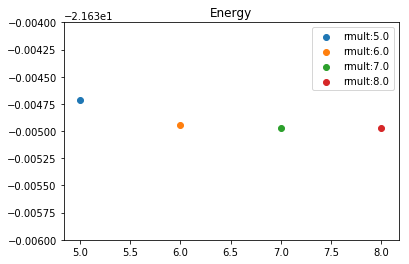

In [32]:
for calc in study.calculators[0]['runs']:
    print study.ids[calc]['rmult'], results[calc].energy, study.names[calc]
    plt.scatter(study.ids[calc]['rmult'],results[calc].energy,label=study.names[calc])
plt.legend()
plt.title('Energy',size=12)
plt.ylim(-21.636,-21.634)
plt.show()

Other useful quantities can be extract using the methods of the logfile class, for instance

In [33]:
print results[0].dipole
print results[0].evals[0][0]
print results[0].log['dft']['rmult']
print results[0].log['Electric Dipole Moment (AU)']

[-0.0002716861, -0.0002716861, -0.06843304]
[-1.01570312 -0.52280767 -0.40801067 -0.40801059 -0.3436257 ]
[5.0, 9.0]
{'norm(P)': 0.0684341231, 'P vector': [-0.0002716861, -0.0002716861, -0.06843304]}


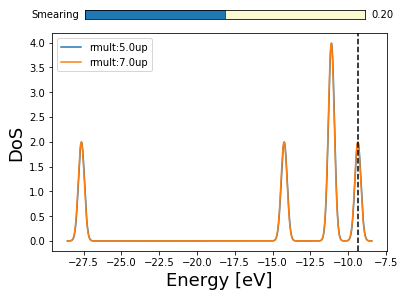

In [34]:
dos = results[0].get_dos(label=study.names[0])
dos.append_from_bandarray(results[2].evals,label=study.names[2])
dos.plot(sigma = 0.2)

## Post processing analysis: fetch_results and post-processing function

Results associated to specific id and/or attribute can be extracted as follows:

In [35]:
study.fetch_results()

[<BigDFT.Logfiles.Logfile instance at 0x7fdac7d69368>,
 <BigDFT.Logfiles.Logfile instance at 0x7fda93752cb0>,
 <BigDFT.Logfiles.Logfile instance at 0x7fda936bffc8>,
 <BigDFT.Logfiles.Logfile instance at 0x7fdac41bfef0>]

If an attribute and/or an id is provided fetch_results extracts only the wanted results, for instance

In [36]:
print  study.fetch_results(attribute='energy')
print  study.fetch_results({'rmult' : 8},attribute='energy')

[-21.634715596005396, -21.634944926201616, -21.634970609120057, -21.634970716032644]
[-21.634970716032644]


It is also possible to define a post-processing function that is passed to the dataset instance. This function
is called after the run and the output of study.run() and contains the output of the post-processing function.
We show some examples.

Extraction of the ground state dipole

In [37]:
def get_dipole(dataset):
    dipole = dataset.fetch_results(attribute='dipole')
    return dipole

In [38]:
study.set_postprocessing_function(get_dipole)

In [39]:
dipole_GS = study.run()
dipole_GS

Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:5.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:5.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:6.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:6.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:7.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:7.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:8.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:8.0 -s Yes


[[-0.0002716861, -0.0002716861, -0.06843304],
 [-3.909925e-05, -3.909925e-05, -0.07145626],
 [8.546611e-07, 8.546611e-07, -0.07191747],
 [-1.416639e-05, -1.416639e-05, -0.07195065]]

Extraction of the box size

In [40]:
def get_size(study): # how to do def get_size(study,unit)
    sizes = []
    results = study.fetch_results()
    for calc,res in enumerate(results):
        sizes.append(res.log['Sizes of the simulation domain']['AU'])
    return sizes

In [41]:
study.set_postprocessing_function(get_size)

In [42]:
boxsize = study.run()
boxsize

Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:5.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:5.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:6.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:6.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:7.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:7.0 -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_GS'
Creating the yaml input file "CO_GS/rmult:8.0.yaml"
Run directory CO_GS
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n rmult:8.0 -s Yes


[[15.54, 15.54, 16.28],
 [18.87, 18.87, 18.87],
 [21.83, 21.83, 21.83],
 [25.16, 25.16, 25.16]]

## Usage of Dataset for the computation of the statical polarizability tensor $\alpha$

We choose a single value of rmult, among the ones computed in the gs analysis, and compute the statical polarizability tensor of the $CO$ molecule

In [43]:
ind = 2
print 'rmult value : ', study.ids[ind]['rmult']

rmult value :  7.0


In [44]:
# The ground state dipole can be extracted in several ways from the previous analysis
print dipole_GS[ind]
print study.fetch_results(study.ids[ind],attribute='dipole')

[8.546611e-07, 8.546611e-07, -0.07191747]
[[8.546611e-07, 8.546611e-07, -0.07191747]]


In [45]:
# set the input file for the statical polarizability computation
inp.set_rmult(coarse = study.ids[ind]['rmult'], fine = 9.0)
inp

{'dft': {'gnrm_cv': 1e-05, 'hgrids': 0.37, 'rmult': [7.0, 9.0]}}

Define the dataset (called ef, i.e. electric field) for the computation of $\alpha$ and append the relevan runs

In [46]:
intensity=1.e-2 #assume that this value is compatible with the linear response regime
ef=D.Dataset(label='alpha',run_dir='CO_alpha',input=inp,posinp='CO_posinp.xyz',d0=dipole_GS[ind],F=intensity)
for idir,coord in enumerate(['x','y','z']):
    el=np.zeros(3)
    el[idir]=intensity
    inp.apply_electric_field(el.tolist())
    ef.append_run({'id': coord,'F':intensity},code,input=inp)

In [47]:
print ef.ids

[{'id': 'x', 'F': 0.01}, {'id': 'y', 'F': 0.01}, {'id': 'z', 'F': 0.01}]


In [48]:
def extract_alpha(ef):
    """
    alpha_ij isthe i-th component of the vector d-d0, computed with a field in the j-th direction,
    divided for the intensity of the field.
    """
    d0=np.array(ef.get_global_option('d0'))
    F=ef.get_global_option('F')
    d=ef.fetch_results(attribute='dipole')
    alpha=np.mat(np.zeros(9)).reshape(3,3)
    for idir in range(3):
        alpha[idir]=(np.array(d[idir])-d0)/F
    return alpha

In [49]:
ef.set_postprocessing_function(extract_alpha)

In [50]:
alpha = ef.run()
alpha

Copy the posinp file 'CO_posinp.xyz' into 'CO_alpha'
Creating the yaml input file "CO_alpha/F:0.01,id:x.yaml"
Run directory CO_alpha
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n F:0.01,id:x -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_alpha'
Creating the yaml input file "CO_alpha/F:0.01,id:y.yaml"
Run directory CO_alpha
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n F:0.01,id:y -s Yes
Copy the posinp file 'CO_posinp.xyz' into 'CO_alpha'
Creating the yaml input file "CO_alpha/F:0.01,id:z.yaml"
Run directory CO_alpha
Executing command:  mpirun -np 4 /home/marco/Applications/BigDFT/binaries/v1.8.3/install/bin/bigdft -n F:0.01,id:z -s Yes


matrix([[ 1.32354445e+01, -6.61113110e-04,  3.81100000e-02],
        [-6.61113110e-04,  1.32354445e+01,  3.81100000e-02],
        [-1.32899430e-04, -1.32899430e-04,  1.87275470e+01]])

A list of posinp for several molecules can be found as follows

In [6]:
from BigDFT.Database import Molecules
CO=Molecules.Molecule('CO')
print CO

Warning, line not parsed: " C 0.0000 0.0000 0.0000
 'NoneType' object has no attribute '__getitem__' "
Warning, line not parsed: " O 0.0000 0.0000 1.1282 'NoneType' object has no attribute '__getitem__' "
{'units': 'angstroem', 'positions': [], 'global monopole': 0.0}


so this analysis can be easily performed for other cases.